In [3]:
#importing packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score

In [4]:
#exploring data
headings = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
dataset = pd.read_csv('data.csv',names=headings)
X = dataset.iloc[1:, 2:31].values
Y = dataset.iloc[1:, 0].values

data = pd.read_csv("data.csv")
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
1      842517         M       20.570         17.77          132.90     1326.0   
2    84300903         M       19.690         21.25          130.00     1203.0   
3    84348301         M       11.420         20.38           77.58      386.1   
4    84358402         M       20.290         14.34          135.10     1297.0   
5      843786         M       12.450         15.70           82.57      477.1   
6      844359         M       18.250         19.98          119.60     1040.0   
7    84458202         M       13.710         20.83           90.20      577.9   
8      844981         M       13.000         21.82           87.50      519.8   
9    84501001         M       12.460         24.04           83.97      475.9   
10     845636         M       16.020         23.24          102.70      797.8   
11   84610002         M     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000180AF4E3860>,
      dtype=object)

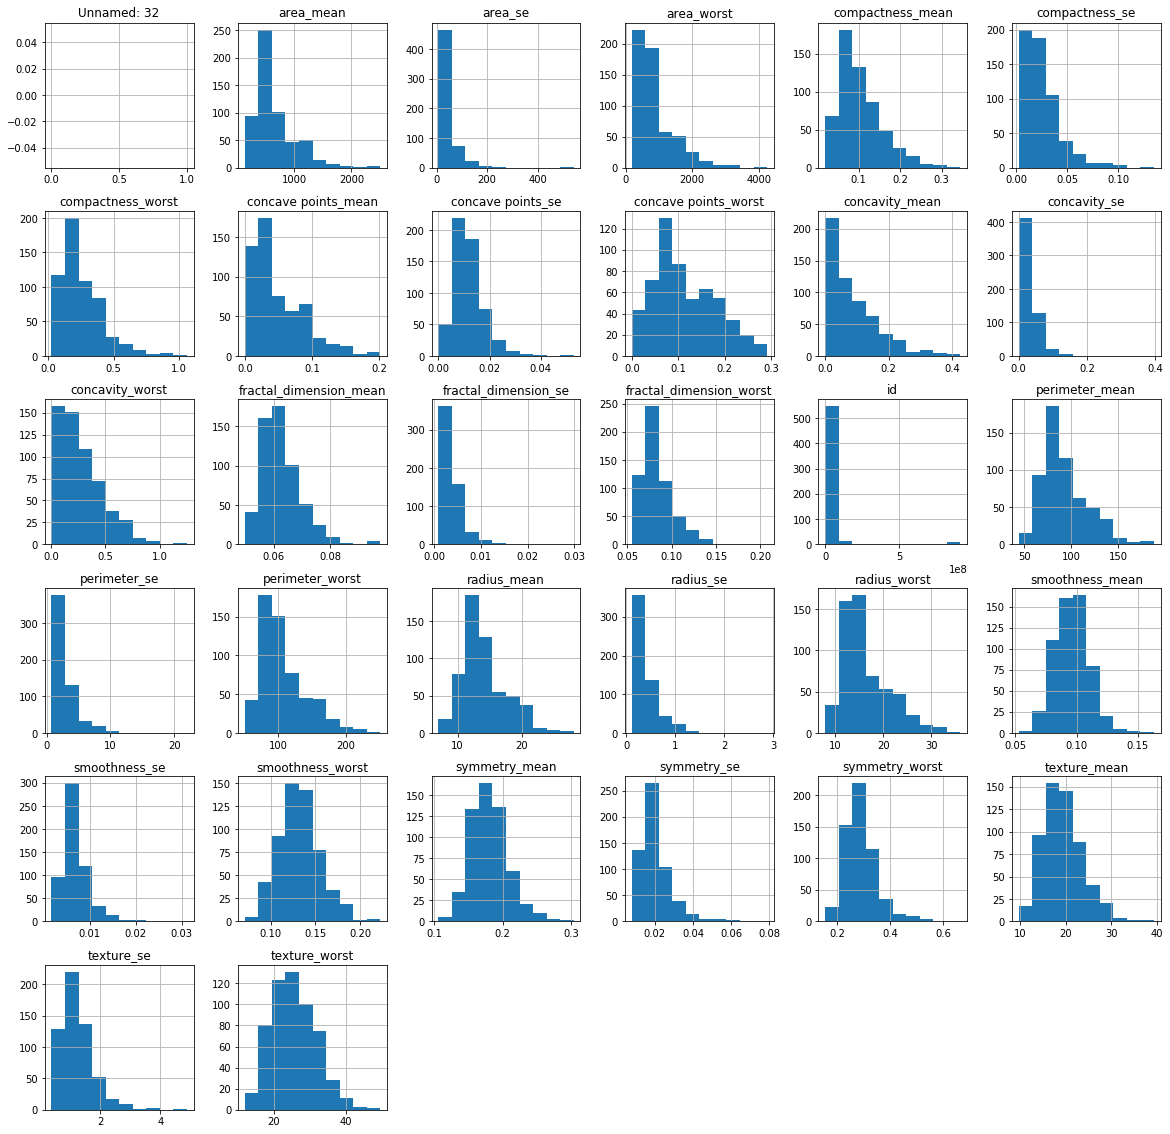

In [5]:
#ploting hist
data.hist(figsize=(20,20))

In [6]:
#printing the dimensions of the dataset
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (570, 32)


In [7]:
#null values in the data set
print(dataset.isnull().sum())
print(dataset.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst    570
dtype: i

In [8]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [9]:
#splitting the data set into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20000)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#trainig our data set with logistic regression to predict the type of cancer 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'newton-cg',random_state=20000)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
#print(Y_pred)
#print(Y_test)
#printing the accuracy score of our prediction
print("\nAccuracy is:",accuracy_score(Y_test, Y_pred))


Accuracy is: 0.9912280701754386


In [11]:
#printing the confuison matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[70  1]
 [ 0 43]]


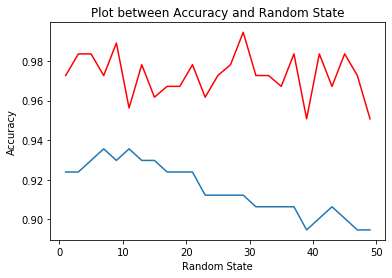

In [12]:
arr1=[]
arr2=[]
#print(arr3)
for i in range(1, 50,2):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.32, random_state = i)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    arr1.append(i)
    arr2.append(acc)
#plt.scatter(arr1,arr2)
plt.plot(arr1,arr2,color="red",label='proposed')
plt.xlabel("Random State")
plt.ylabel("Accuracy")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

#plt.plot(arr1,arr3,color="blue")
score_list = []
for each in range(1,50,2):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(x_train, y_train)
    score_list.append(knn_2.score(x_test,y_test))

plt.plot(range(1,50,2), score_list,label='original')
plt.title('Plot between Accuracy and Random State')
#plt.xlabel("random state")
#plt.ylabel("Accuracy")
plt.show()

In [13]:
mae2 = [0]*len(Y_test)
for i in range(len(Y_test)):
    if Y_test[i] - Y_pred[i] < 0:
        x = -1*(Y_test[i] - Y_pred[i])
    else:
        x = Y_test[i] - Y_pred[i]
    mae2[i] = mae2[i] + x

In [14]:
mae1 = [0]*len(Y_test)
for i in range(len(Y_test)):
    if Y_test[i] - Y_pred[i] < 0:
        x = -1*(Y_test[i] - Y_train[i])
    else:
        x = Y_test[i] - Y_pred[i]
    mae1[i] = mae1[i] + x
print(sum(mae1)/183)    
print(sum(mae2)/183)    

0.03825136612021858
0.04918032786885246


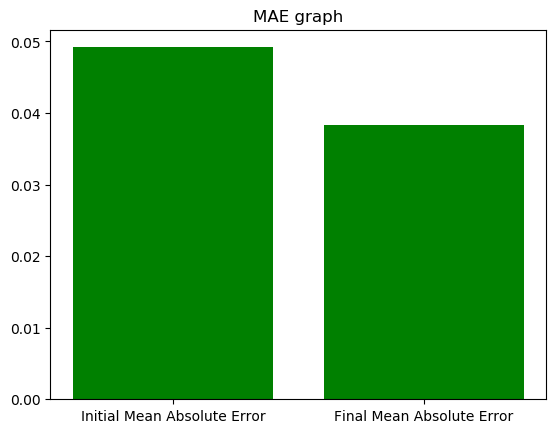

In [15]:
objects=('Initial Mean Absolute Error','Final Mean Absolute Error')
plt.rcdefaults()
y_pos=np.arange(len(objects))
performance=[sum(mae2)/183,sum(mae1)/183]
plt.bar(y_pos,performance,align='center',color='green')
plt.xticks(y_pos,objects)
plt.ylabel('')
plt.title('MAE graph')
plt.show()

In [16]:
rms1 = 0
for i in range(len(Y_test)):
    rms1 += (Y_test[i] - Y_train[i])**2
rms1 = (rms1**(0.5))/len(Y_test)

In [17]:
rms2 = 0
for i in range(len(Y_test)):
    rms2 += (Y_test[i] - Y_pred[i])**2
rms2 = (rms2**(0.5))/len(Y_test)

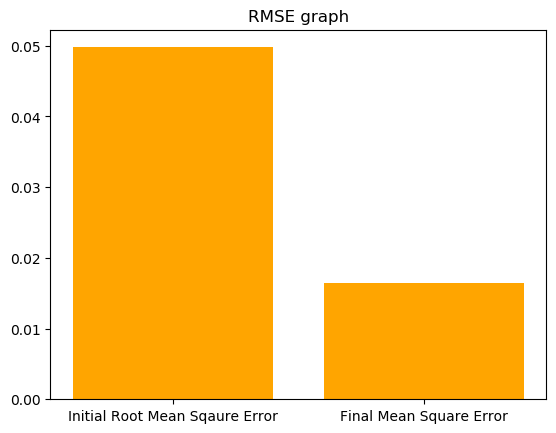

In [18]:
objects=('Initial Root Mean Sqaure Error','Final Mean Square Error')
plt.rcdefaults()
y_pos=np.arange(len(objects))
performance=[rms1,rms2]
plt.bar(y_pos,performance,align='center',color='orange')
plt.xticks(y_pos,objects)
plt.ylabel('')
plt.title('RMSE graph')
plt.show()

In [19]:
print(rms1)
print(rms2)

0.04978379004996885
0.01639344262295082
